In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Загрузить данные
train = pd.read_csv('data/train.csv')
stores = pd.read_csv('data/stores.csv')
test = pd.read_csv('data/test.csv')

# Первые несколько строк
print(train.head())
print(stores.head())
print(test.head())

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4
        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2

In [4]:
# Проверить информацию о данных
print(train.info())
print(stores.info())
print(test.info())

# Проверить пропуски
print(train.isnull().sum())
print(stores.isnull().sum())
print(test.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------

C:\Users\14488\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


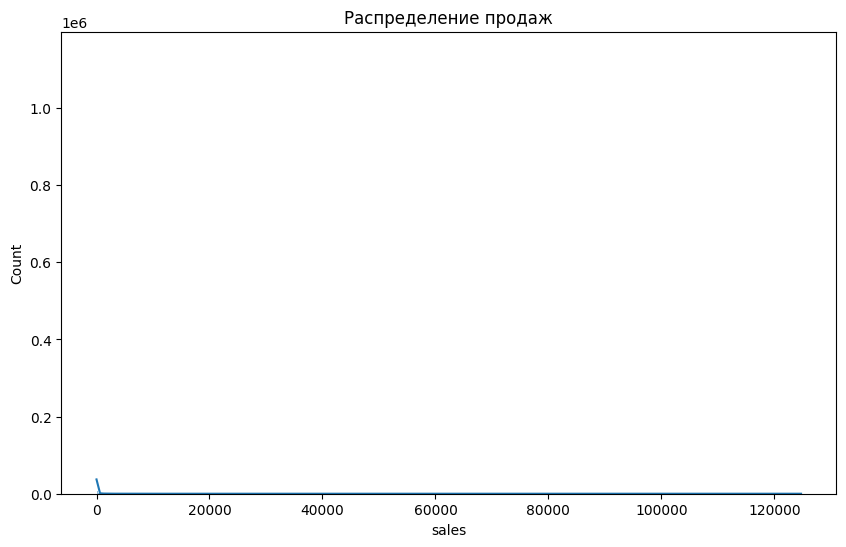

In [6]:
# Распределение продаж
plt.figure(figsize=(10,6))
sns.histplot(train['sales'], kde=True)
plt.title('Распределение продаж')
plt.show()

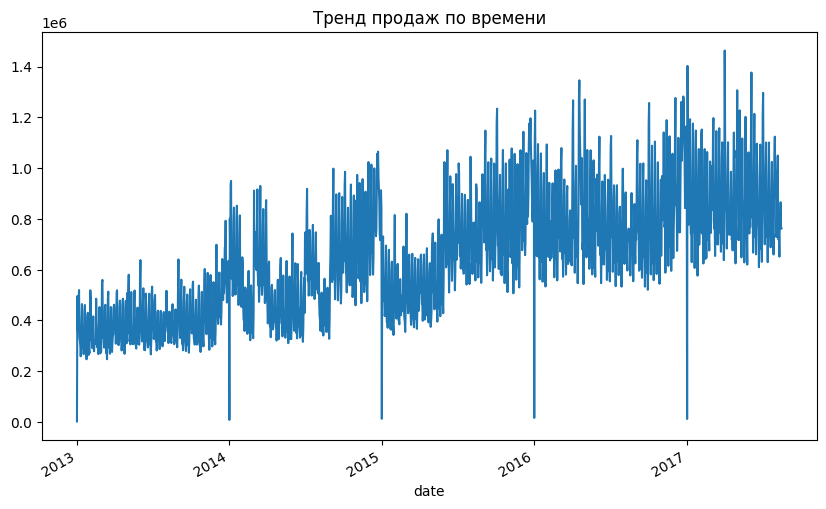

In [7]:
# Преобразование даты в datetime формат
train['date'] = pd.to_datetime(train['date'])

# Визуализация тренда продаж по времени
plt.figure(figsize=(10,6))
train.groupby('date')['sales'].sum().plot()
plt.title('Тренд продаж по времени')
plt.show()


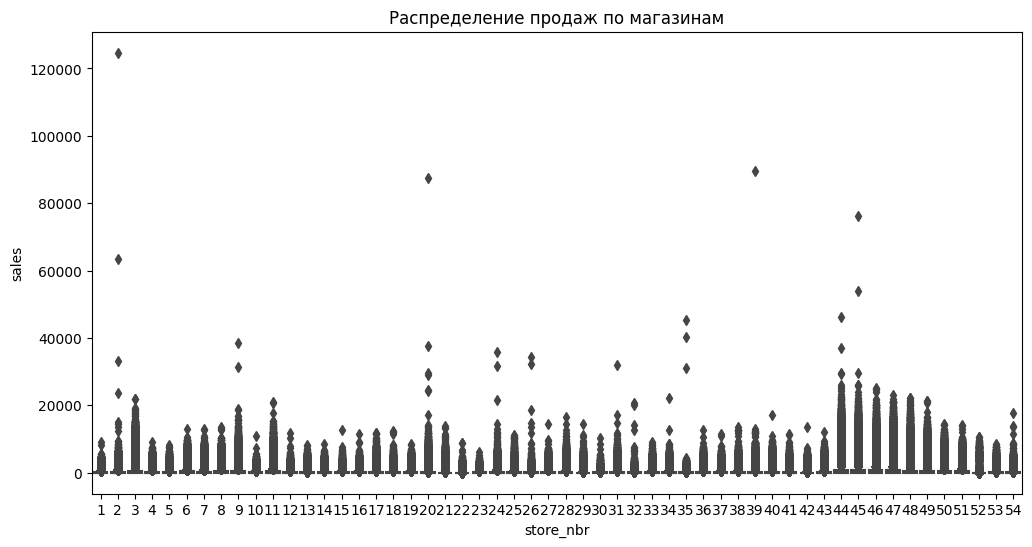

In [14]:
# Распределение продаж по магазинам
plt.figure(figsize=(12,6))
sns.boxplot(x='store_nbr', y='sales', data=train)
plt.title('Распределение продаж по магазинам')
plt.show()

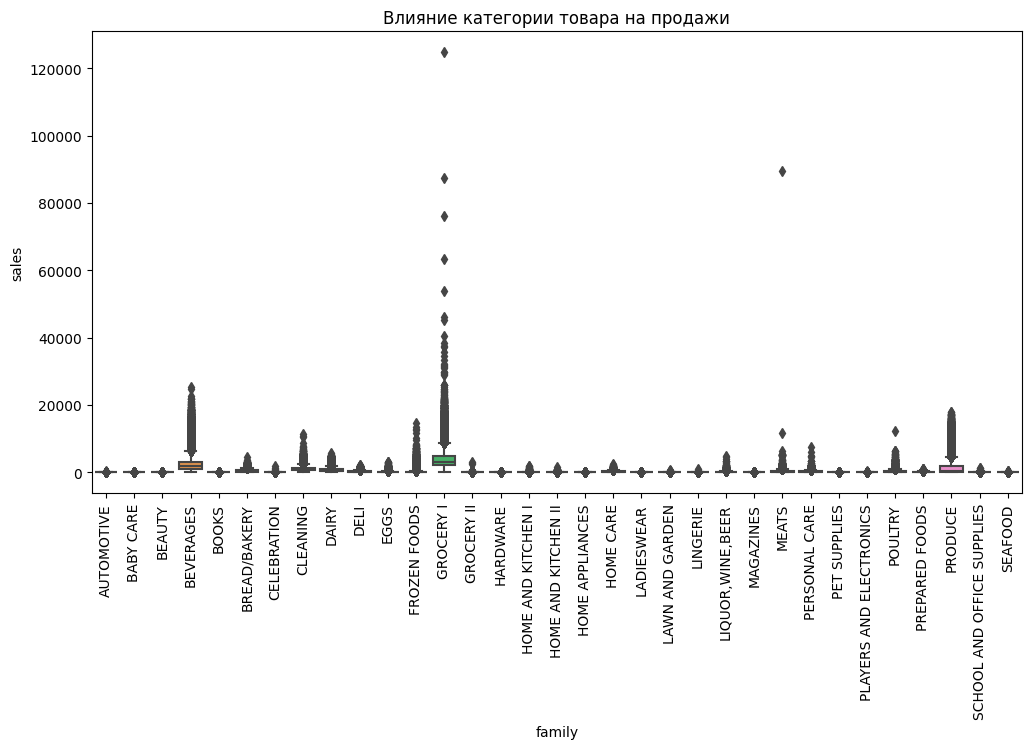

In [15]:
# Преобразуем столбец 'family' в строковый формат
train['family'] = train['family'].astype(str)
# Влияние категории товара на продажи
plt.figure(figsize=(12,6))
sns.boxplot(x='family', y='sales', data=train)
plt.title('Влияние категории товара на продажи')
plt.xticks(rotation=90)  # Для лучшего отображения меток на оси x
plt.show()


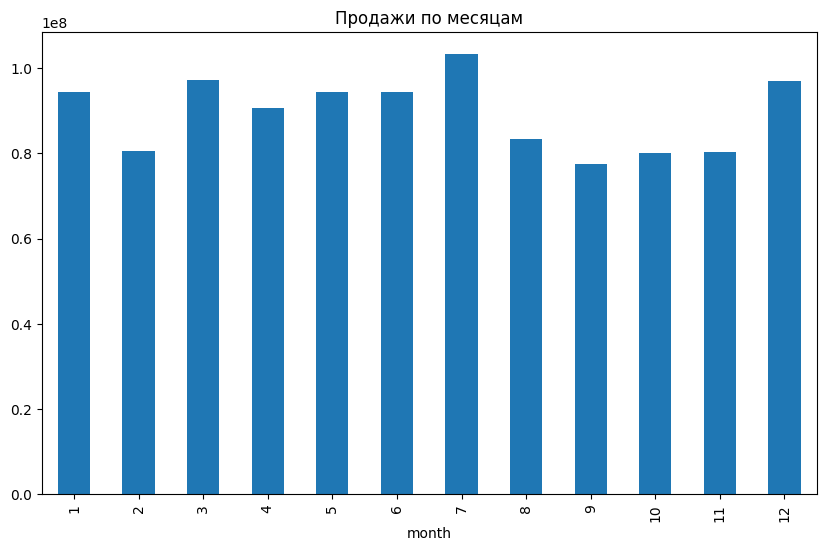

In [9]:
# Агрегация по месяцам
train['month'] = train['date'].dt.month
monthly_sales = train.groupby('month')['sales'].sum()

plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar')
plt.title('Продажи по месяцам')
plt.show()


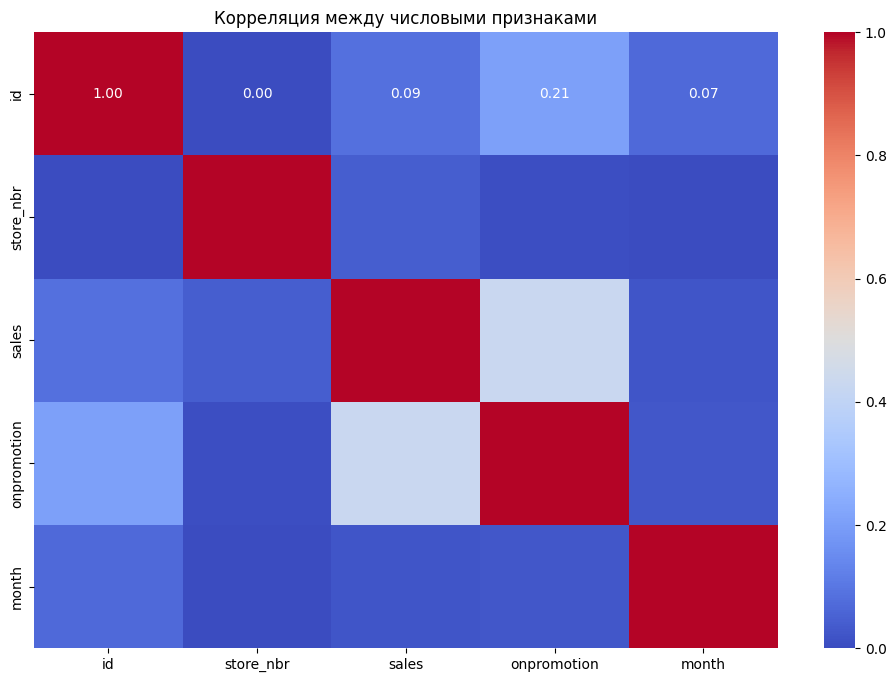

In [11]:
# Выбрать только числовые столбцы для анализа
numeric_columns = train.select_dtypes(include=['number']).columns

# Корреляция между числовыми признаками
correlation_matrix = train[numeric_columns].corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между числовыми признаками')
plt.show()


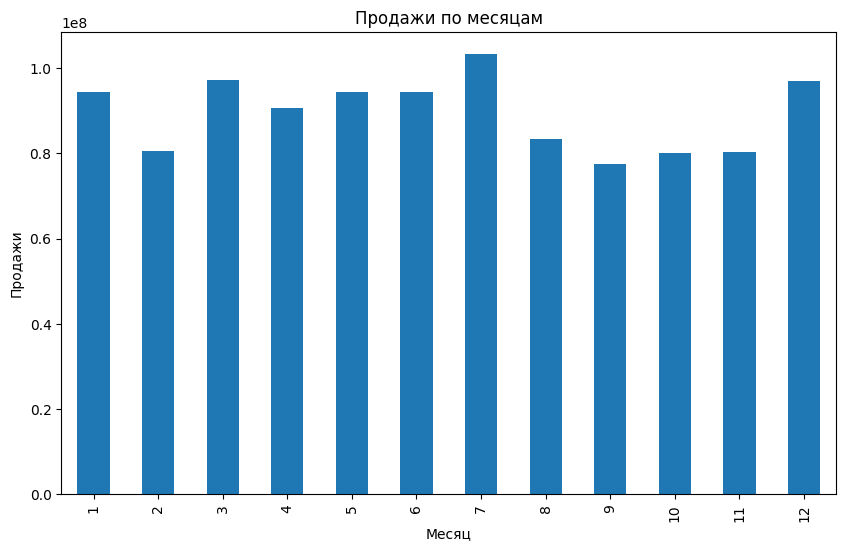

In [16]:
# Агрегация данных по месяцам
monthly_sales = train.groupby('month')['sales'].sum()

plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar')
plt.title('Продажи по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Продажи')
plt.show()


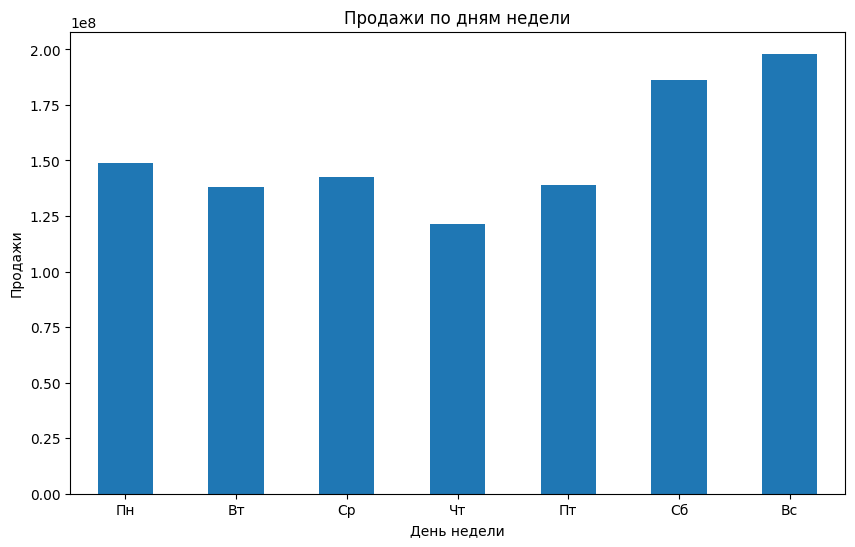

In [17]:
# Преобразуем дату в день недели
train['day_of_week'] = train['date'].dt.dayofweek

# Агрегация по дням недели
weekly_sales = train.groupby('day_of_week')['sales'].sum()

plt.figure(figsize=(10,6))
weekly_sales.plot(kind='bar')
plt.title('Продажи по дням недели')
plt.xlabel('День недели')
plt.ylabel('Продажи')
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'], rotation=0)
plt.show()


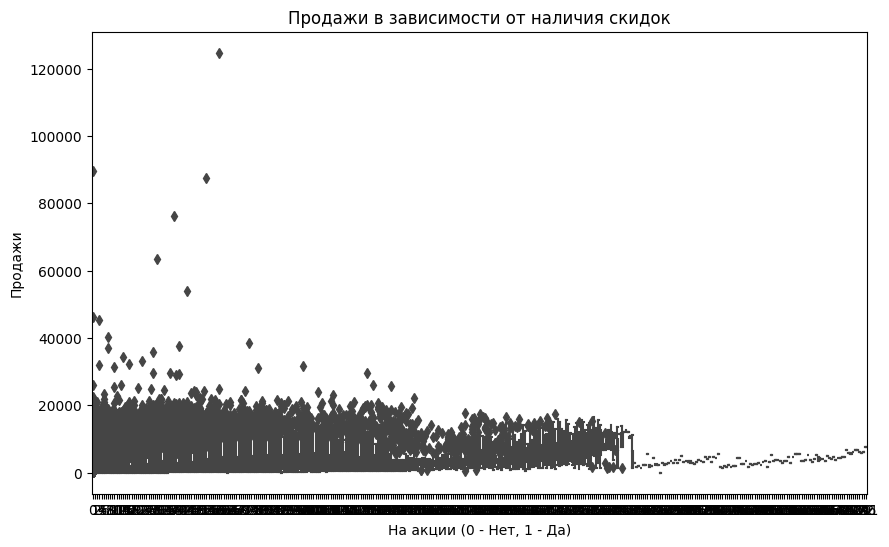

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='onpromotion', y='sales', data=train)
plt.title('Продажи в зависимости от наличия скидок')
plt.xlabel('На акции (0 - Нет, 1 - Да)')
plt.ylabel('Продажи')
plt.show()


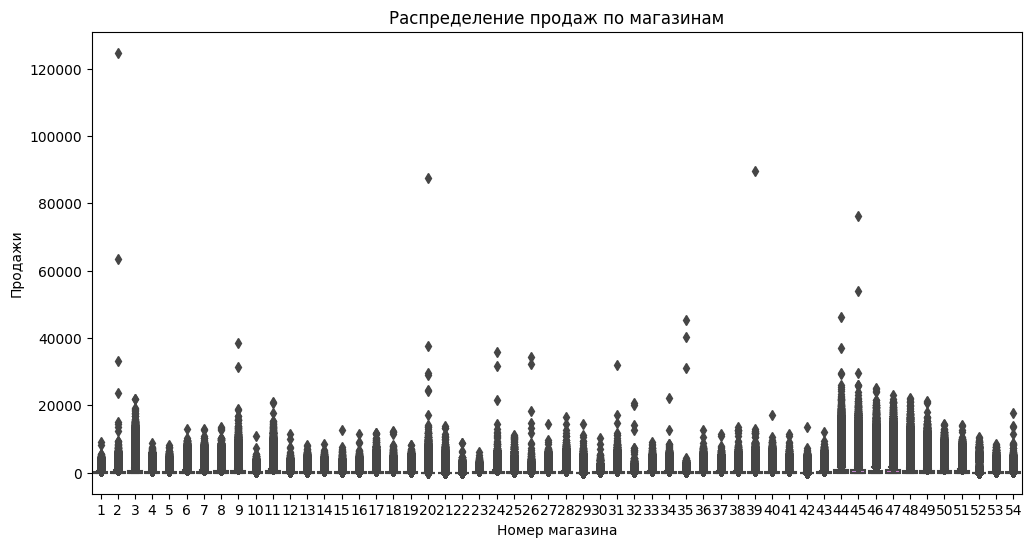

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x='store_nbr', y='sales', data=train)
plt.title('Распределение продаж по магазинам')
plt.xlabel('Номер магазина')
plt.ylabel('Продажи')
plt.show()


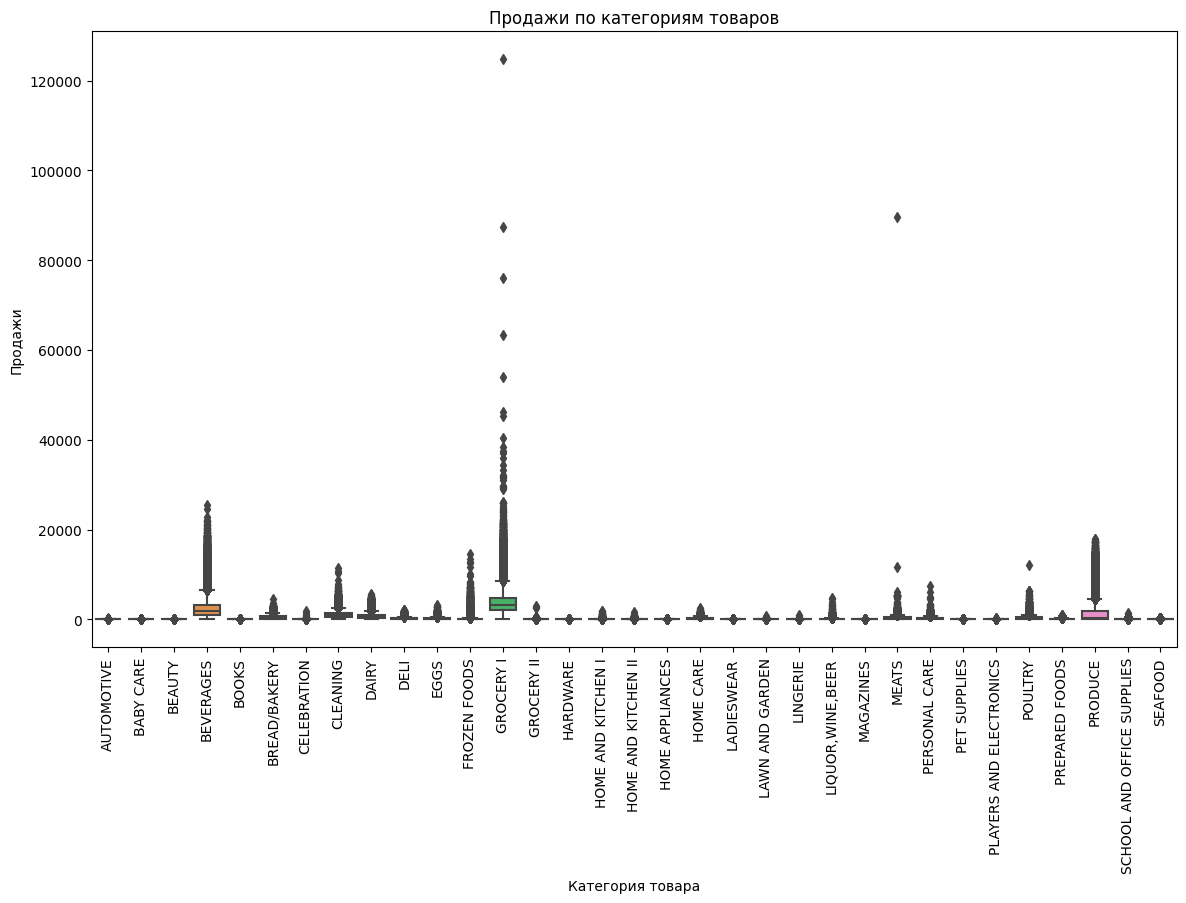

In [20]:
plt.figure(figsize=(14,8))
sns.boxplot(x='family', y='sales', data=train)
plt.title('Продажи по категориям товаров')
plt.xlabel('Категория товара')
plt.ylabel('Продажи')
plt.xticks(rotation=90)  # Для лучшего отображения
plt.show()


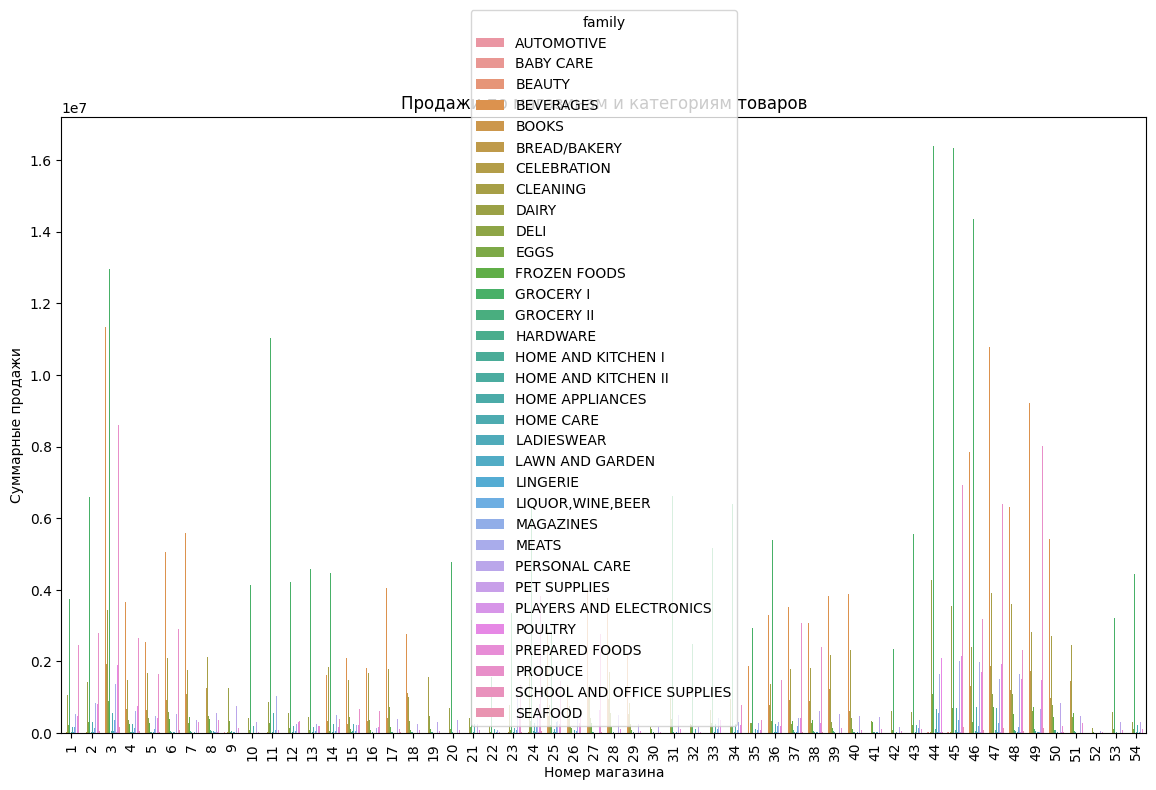

In [21]:
# Агрегация данных по магазинам и категориям товаров
store_family_sales = train.groupby(['store_nbr', 'family'])['sales'].sum().reset_index()

plt.figure(figsize=(14,8))
sns.barplot(x='store_nbr', y='sales', hue='family', data=store_family_sales)
plt.title('Продажи по магазинам и категориям товаров')
plt.xlabel('Номер магазина')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=90)
plt.show()


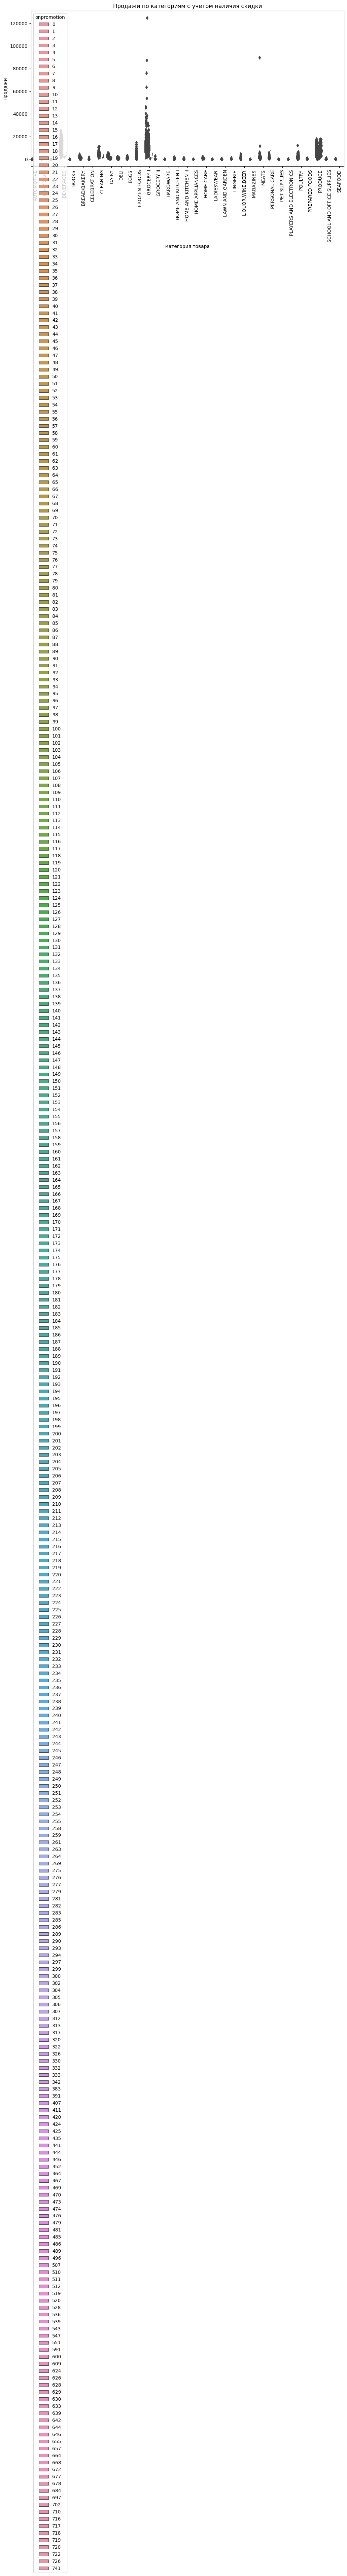

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(x='family', y='sales', hue='onpromotion', data=train)
plt.title('Продажи по категориям с учетом наличия скидки')
plt.xlabel('Категория товара')
plt.ylabel('Продажи')
plt.xticks(rotation=90)
plt.show()


<Figure size 1200x600 with 0 Axes>

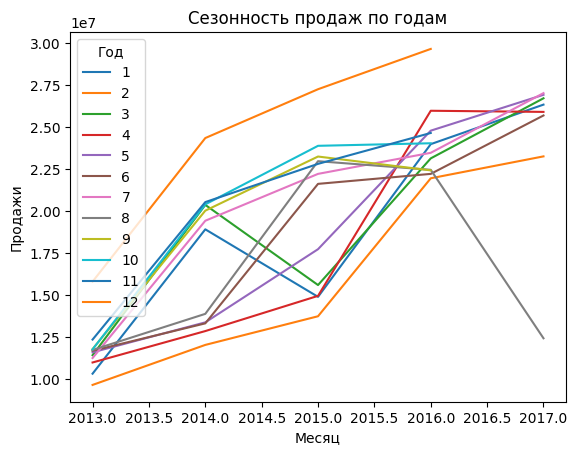

In [23]:
# Добавим год в DataFrame
train['year'] = train['date'].dt.year

# Агрегация по годам и месяцам
yearly_monthly_sales = train.groupby(['year', 'month'])['sales'].sum().unstack()

plt.figure(figsize=(12,6))
yearly_monthly_sales.plot()
plt.title('Сезонность продаж по годам')
plt.xlabel('Месяц')
plt.ylabel('Продажи')
plt.legend(title='Год')
plt.show()
